# Projeto Módulo 1 - Análise de Dados do Tabnet  

<br>

Nesse projeto, será analisado outras bases de dados obtidas através do Tabnet, o sistema de dados do SUS.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
pd.options.display.float_format = "{:.2f}".format

## Carregando os Datasets

In [3]:
## Carregando os datasets

#Internações realizadas no SUS por ano e mes de processamento
internacoes = pd.read_csv('./dados/internacoes-por-ano-mes-processamento.csv', 
                          encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=6)

#Média de dias das internações 
media_permanencia_internacoes = pd.read_csv('./dados/media-permanencia-ano-mes-processamento.csv',
                                           encoding='ISO-8859-1', sep=';', skiprows=3, 
                                           skipfooter=6, decimal=',')

#Óbitos registrados no SUS
obitos = pd.read_csv('./dados/obito-ano-mes-processamento.csv', encoding='ISO-8859-1', sep=';',
                     skiprows=3, skipfooter=6)

#Taxa de mortalidade por estados
taxa_mortalidade = pd.read_csv('./dados/taxa-mortalidade-por ano-mes-processamento.csv',
                               encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=6,
                               decimal=',')

#Gastos do sus
gastos_sus = pd.read_csv('./dados/gastos-sus.csv', encoding='ISO-8859-1', sep=';', skiprows=3,
                         skipfooter=12, decimal=',', thousands='.')

/home/johnny/Documentos/dev/data-science/ds/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
lista_df = ['internacoes', 'media_permanencia_internacoes', 
            'obitos', 'taxa_mortalidade', 'gastos_sus']

## Verificando e ajustando os Datasets  
Antes de realizarmos a análise de dados proprimanete, precisamos avaliar se não existem dados faltantes e ou ajustes a serem tratados.  
Um dos primeiros itens a serem tratados é o campo unidade da federação, que existem em todos os datasets. Esse campo está com um número de dois dígitos indicando a região do país e logo em seguida vem a descrição completa do estado. Para facilitar a leitura, vamos retirar os numerais e colocar os estados na forma abreviada, ou seja, em UF's.

In [5]:
#Dicionário definindo as abreviações.
siglas = {'Acre': 'AC', 'Alagoas' : 'AL', 'Amazonas' : 'AM', 'Amapá' : 'AP',
         'Bahia' : 'BA', 'Ceará': 'CE', 'Distrito Federal' : 'DF', 'Espírito Santo': 'ES',
         'Goiás': 'GO', 'Maranhão': 'MA', 'Mato Grosso' : 'MT', 'Mato Grosso do Sul' : 'MS',
         'Minas Gerais' : 'MG', 'Pará' : 'PA', 'Paraná': 'PR', 'Paraíba' : 'PB', 
         'Pernambuco' : 'PE', 'Piauí' : 'PI', 'Rio de Janeiro' : 'RJ', 
         'Rio Grande do Norte' : 'RN', 'Rio Grande do Sul' : 'RS', 'Rondônia' : 'RO', 
         'Roraima' : 'RR', 'Santa Catarina' : 'SC', 'São Paulo' : 'SP', 
         'Sergipe' : 'SE', 'Tocantins' : 'TO'}

def converter_uf(df):
    lista_colunas = list(df.columns)
    df['Unidade da Federação'] = df['Unidade da Federação'].str.split(' ', 1).str[1]
    df['UF'] = df['Unidade da Federação'].map(siglas)
    
    lista_colunas.insert(1, 'UF')
    df = df.reindex(columns=lista_colunas)
    df = df.set_index('UF')
    
    return df
    

In [6]:
internacoes = converter_uf(internacoes)
media_permanencia_internacoes = converter_uf(media_permanencia_internacoes)
obitos = converter_uf(obitos)
taxa_mortalidade = converter_uf(taxa_mortalidade)
gastos_sus = converter_uf(gastos_sus)

In [7]:
gastos_sus.head(20)

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
UF,,,,,,,,,,,,,,,,,,,,,
RO,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,9858841.18,9806315.07,14946369.28,15552930.66,16269008.71,15380532.08,14228814.25,12427865.05,10345616.78,1088059702.25
AC,Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3715723.12,3538427.92,4077045.92,6307616.67,6354514.15,3461663.11,4979239.30,4138751.64,-,475290315.34
AM,Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,21621697.26,26163677.75,23445832.76,23154039.32,26127701.15,26447055.27,24457791.81,22731356.54,19840265.30,2061943006.93
RR,Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3266928.47,3519773.73,4437161.10,5171370.92,4266254.94,3103979.88,3743330.65,3781921.16,3150835.05,352546288.71
PA,Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,38813794.18,39251569.26,40639703.77,46608262.09,55310881.51,48215050.10,45801750.84,43262884.30,14569318.55,4968811817.17
AP,Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,...,2807807.85,2822559.17,3188210.98,3616822.40,4379596.14,3808085.03,5211715.56,5263137.94,5032883.11,337181964.14
TO,Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,...,7297673.11,9875312.13,10651036.24,9365632.90,9493726.37,10650363.76,9790960.71,9735208.07,773480.42,1110344733.46
MA,Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,...,31798852.85,32611445.91,44534337.62,50000737.43,52984947.37,50461554.99,50500013.97,41501696.81,36250671.51,4161325769.23
PI,Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,...,22689390.32,20983255.97,21609265.95,27405790.99,30110761.69,31075168.71,29401741.26,27694895.48,20752326.97,2450508593.82


Para facilitar a leitura dos dados posteriormente, vamos dividir os valores em milhares.

In [8]:
#Criar lista com as colunas que contém valores numéricos
#excluindo a primeira coluna, a unidade da federação
colunas_numericas = list(gastos_sus.select_dtypes('number'))

#Aplicar na lista de colunas numéricas a divisão de milhar
gastos_sus[colunas_numericas] = gastos_sus[colunas_numericas].apply(lambda x: x / 1e6)

In [9]:
gastos_sus

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
UF,,,,,,,,,,,,,,,,,,,,,
RO,Rondônia,1.39,2.93,1.54,1.53,1.65,1.41,3.07,3.23,3.12,...,9.86,9.81,14.95,15.55,16.27,15.38,14.23,12.43,10345616.78,1088.06
AC,Acre,0.90,1.50,1.79,1.73,1.82,1.83,2.51,2.09,2.28,...,3.72,3.54,4.08,6.31,6.35,3.46,4.98,4.14,-,475.29
AM,Amazonas,4.74,7.12,8.20,8.26,7.83,8.48,9.37,9.35,9.36,...,21.62,26.16,23.45,23.15,26.13,26.45,24.46,22.73,19840265.30,2061.94
RR,Roraima,0.66,0.78,0.72,0.84,0.86,0.83,1.00,0.89,0.91,...,3.27,3.52,4.44,5.17,4.27,3.10,3.74,3.78,3150835.05,352.55
PA,Pará,18.86,19.55,21.94,20.84,23.25,23.24,24.00,23.34,25.17,...,38.81,39.25,40.64,46.61,55.31,48.22,45.80,43.26,14569318.55,4968.81
AP,Amapá,1.12,1.27,0.97,1.14,0.87,1.44,1.43,1.48,1.65,...,2.81,2.82,3.19,3.62,4.38,3.81,5.21,5.26,5032883.11,337.18
TO,Tocantins,3.44,4.99,6.21,4.98,5.51,4.93,5.45,5.41,5.60,...,7.30,9.88,10.65,9.37,9.49,10.65,9.79,9.74,773480.42,1110.34
MA,Maranhão,10.72,13.56,13.99,14.81,14.51,14.91,15.78,15.20,14.95,...,31.80,32.61,44.53,50.00,52.98,50.46,50.50,41.50,36250671.51,4161.33
PI,Piauí,7.99,10.08,10.30,10.78,10.40,10.53,11.04,10.55,10.90,...,22.69,20.98,21.61,27.41,30.11,31.08,29.40,27.69,20752326.97,2450.51


Outro ponto é padronizar o período dos dataset. Vamos verificar primeiro se todos os datasets possuem a mesma quantidade de colunas, isso é, de meses.

In [10]:
print(f'Quantidade de colunas do df internações: {internacoes.shape[1]}')
print(f'Quantidade de colunas do df media permanencia: {media_permanencia_internacoes.shape[1]}')
print(f'Quantidade de colunas do df obitos: {obitos.shape[1]}')
print(f'Quantidade de colunas do df taxa mortalidade: {taxa_mortalidade.shape[1]}')
print(f'Quantidade de colunas do df gastos sus: {gastos_sus.shape[1]}')

Quantidade de colunas do df internações: 167
Quantidade de colunas do df media permanencia: 167
Quantidade de colunas do df obitos: 167
Quantidade de colunas do df taxa mortalidade: 167
Quantidade de colunas do df gastos sus: 167


Todas os dataframe possuem a mesma dimensão, podemos seguir em frente.  
Vamos delimintar o período da análise entre 2010 até 2020 para entendermos o que aconteceu na saúde nesses útimos 10 anos.

In [11]:
def filtrar_colunas(df):
    df = df.iloc[ :-1 , 25:-10]
    return df

In [12]:
obitos.columns

Index(['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr',
       '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set',
       ...
       '2021/Jan', '2021/Fev', '2021/Mar', '2021/Abr', '2021/Mai', '2021/Jun',
       '2021/Jul', '2021/Ago', '2021/Set', 'Total'],
      dtype='object', length=167)

In [13]:
internacoes = filtrar_colunas(internacoes)
media_permanencia_internacoes = filtrar_colunas(media_permanencia_internacoes)
obitos = filtrar_colunas(obitos)
taxa_mortalidade = filtrar_colunas(taxa_mortalidade)
gastos_sus = filtrar_colunas(gastos_sus)

Outro transformação a ser realizado é transpor as colunas e linhas, para que os estados estejam nas colunas e as datas estejam na linha.

In [14]:
new_internacoes = internacoes.T
new_media_permanencia_internacoes = media_permanencia_internacoes.T
new_obitos = obitos.T
new_taxa_mortalidade = taxa_mortalidade.T
new_gastos_sus = gastos_sus.T

nova_lista_df = ['new_internacoes', 'new_media_permanencia_internacoes', 
                 'new_obitos', 'new_taxa_mortalidade', 'new_gastos_sus']

## Verificando Valores Nulos  
Como os valores nulos podem atrapalhar na nossa análise, vamos verificar se elas existem para poder ser tratado.

In [15]:
def verifica_nulls(df):
    if sum(df.isnull().sum()) == 0:
        print('O dataframe verificado não possui valores nulos')
        
    else:
        print(f'O dataframe verificado possui valores nulos.')

In [16]:
for df in nova_lista_df:
    print(df)
    exec(f'verifica_nulls({df})')
    print('\n')

new_internacoes
O dataframe verificado não possui valores nulos


new_media_permanencia_internacoes
O dataframe verificado não possui valores nulos


new_obitos
O dataframe verificado não possui valores nulos


new_taxa_mortalidade
O dataframe verificado não possui valores nulos


new_gastos_sus
O dataframe verificado não possui valores nulos




## Análise de Dados  
Antes de realizarmos as análises, vamos definir algumas constantes que serão utilizadas durante quase todas análises.   
Primeiro, o mesmo delimitando em 10 anos, isso quer dizer que vamos vizualizar 132 meses e isso é inviável ler no eixo X. Portanto vamos criar uma lista para o eixo x com período semestral.

In [17]:
intervalo_eixo_x = list(new_obitos.index) #cria a lista com todos os meses.

intervalos = [(x) * 6 for x in range(22)] #cria uma lista com números interos, pulando de 6 em 6

#lista com as descrições dos eixos
eixo_x = list()
for intervalo in intervalos:
    eixo_x.append(intervalo_eixo_x[intervalo])
    
eixo_x.append('2020/Dez') #adicionamos manualmente o último mes, pois ele não entrou no loop
eixo_x

['2010/Jan',
 '2010/Jul',
 '2011/Jan',
 '2011/Jul',
 '2012/Jan',
 '2012/Jul',
 '2013/Jan',
 '2013/Jul',
 '2014/Jan',
 '2014/Jul',
 '2015/Jan',
 '2015/Jul',
 '2016/Jan',
 '2016/Jul',
 '2017/Jan',
 '2017/Jul',
 '2018/Jan',
 '2018/Jul',
 '2019/Jan',
 '2019/Jul',
 '2020/Jan',
 '2020/Jul',
 '2020/Dez']

O outro é criar uma variável com contendo as UF's dos estados, que a princípio sempre serão os mesmos.

In [18]:
ufs = list(new_gastos_sus.columns)
ufs

['RO',
 'AC',
 'AM',
 'RR',
 'PA',
 'AP',
 'TO',
 'MA',
 'PI',
 'CE',
 'RN',
 'PB',
 'PE',
 'AL',
 'SE',
 'BA',
 'MG',
 'ES',
 'RJ',
 'SP',
 'PR',
 'SC',
 'RS',
 'MS',
 'MT',
 'GO']

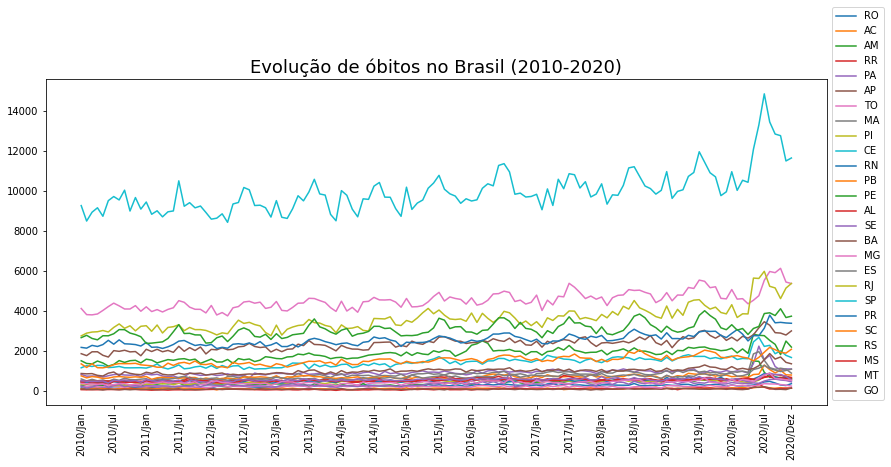

In [19]:
plt.figure(figsize=(14, 6))
plt.title('Evolução de óbitos no Brasil (2010-2020)', fontsize=18)
plt.plot(new_obitos.index, new_obitos)
plt.legend(ufs, loc='lower left', bbox_to_anchor=[1, 0])
plt.xticks(eixo_x, rotation=90)
plt.show()

Como se dá para imaginar, é inviável avaliar todos os estados de uma vez, pois as cores podem se duplicar e as linhas ficam sobrepostas. Vamos avaliar os estados do sudeste.

In [20]:
norte = ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
sudeste = ['SP', 'RJ', 'ES', 'MG']
nordeste = ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
centro_oeste = ['MT', 'MS', 'GO']
sul = ['PR', 'RS', 'SC']

In [21]:
new_obitos.columns

Index(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB',
       'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS',
       'MT', 'GO', 'DF'],
      dtype='object', name='UF')

In [22]:
def plot_grafico_linhas(df, titulo_grafico = '', regiao=None):
    plt.figure(figsize=(14, 8))
    plt.title(f'{titulo_grafico}', fontsize=18)
    
    #Verifica se foi especificado as regiões ou estados para plot
    #Caso contrário ele irá plotar todos os estados.
    if regiao == None:
        plt.plot(df.index, df)
        plt.xticks(eixo_x, rotation=90)
        plt.show()
    
    else:
        plt.plot(df.index, df[regiao])
        plt.xticks(eixo_x, rotation=90)
        plt.legend(regiao, loc='upper left')
        plt.show()
    

In [23]:
def plot_obitos_por_regiao(regiao, titulo):
    plt.figure(figsize=(14, 6))
    plt.title(f'Evolução de óbitos no {titulo} (2010-2020)', fontsize=18)
    plt.plot(new_obitos.index, new_obitos[regiao])
    plt.legend(regiao, loc='upper left')
    plt.xticks(eixo_x, rotation=90)
    plt.show()

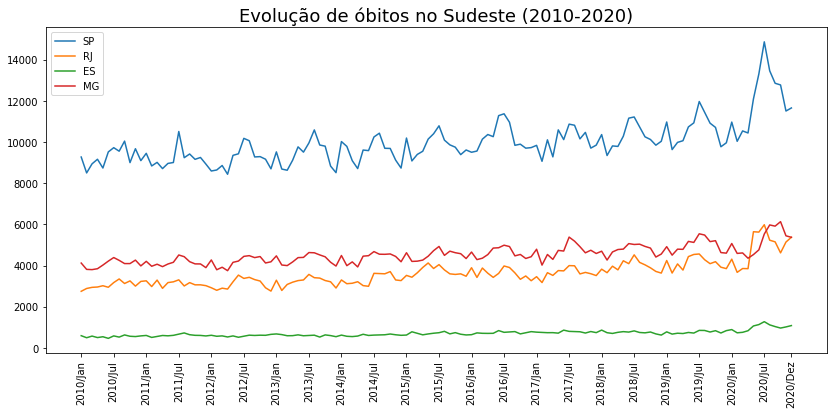

In [24]:
plot_obitos_por_regiao(sudeste, 'Sudeste')

Bem melhor. Aqui já podemos observar que a quantidade de óbito mantém quase uma constância, mas que apresenta um aumento relevante a partir de 2020, quando começou a pandemia. Vamos verificar se outras regiões apresentam o mesmo comportamento.

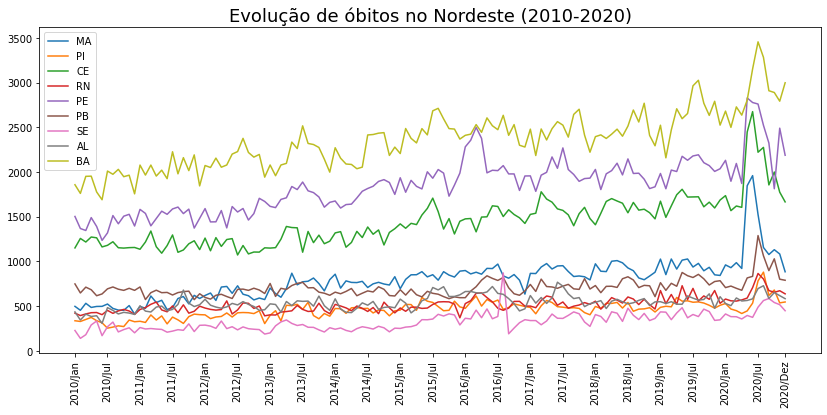

In [25]:
plot_obitos_por_regiao(nordeste, 'Nordeste')

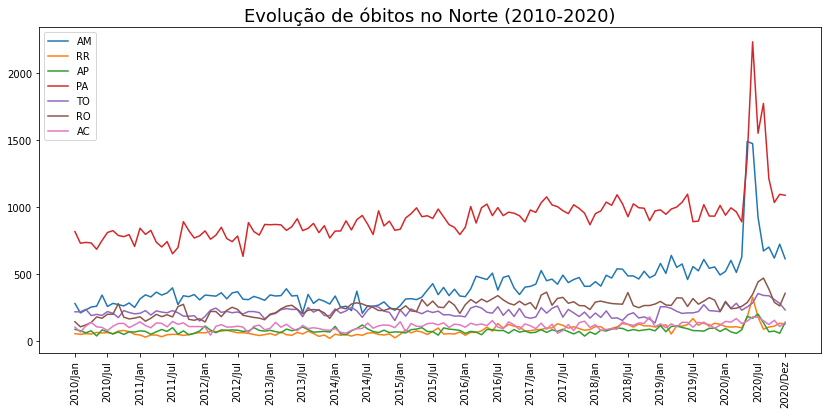

In [26]:
plot_obitos_por_regiao(norte, 'Norte')

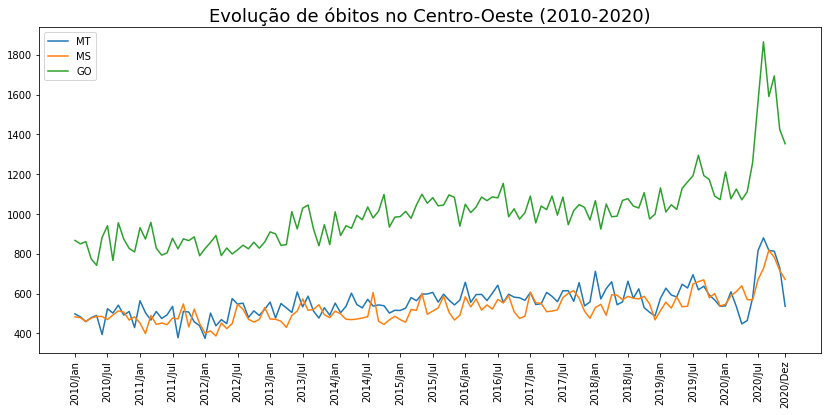

In [27]:
plot_obitos_por_regiao(centro_oeste, 'Centro-Oeste')

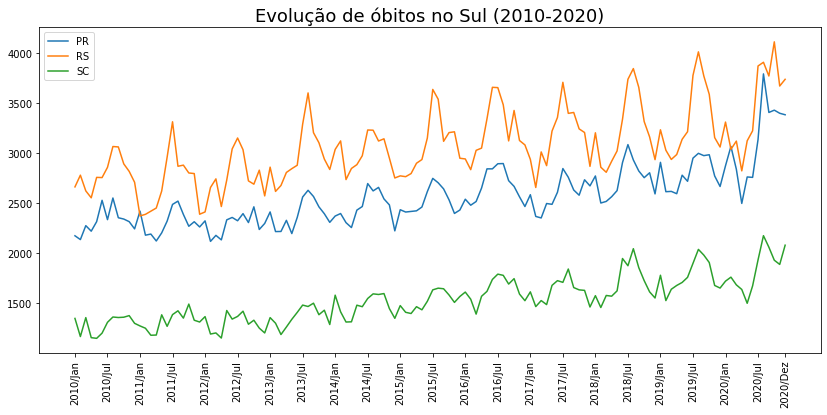

In [28]:
plot_obitos_por_regiao(sul, 'Sul')

Vimos portanto que todos os estamos mantém essa guinada nos óbitos a partir de 2020, mas a região sul é intrigante - puxado pelo Rio Grande do Sul, os valores oscilam mais que outras regiões.  
Outro ponto a ser levado em conta é que estamos vendo os óbitos, sem considerar a densidade demográfica dos estados - o estado de São Paulo é um dos mais populoso do Brasil e naturalmente teria uma quantidade de morte maior que os outros estados.  
Por isso baixei também a taxa de mortalidade, que por considerar a densidade demográfica podemos realmente comparar com os outros estados.

#### A Taxa de Mortalidade aumentou a partir a Pandemia?

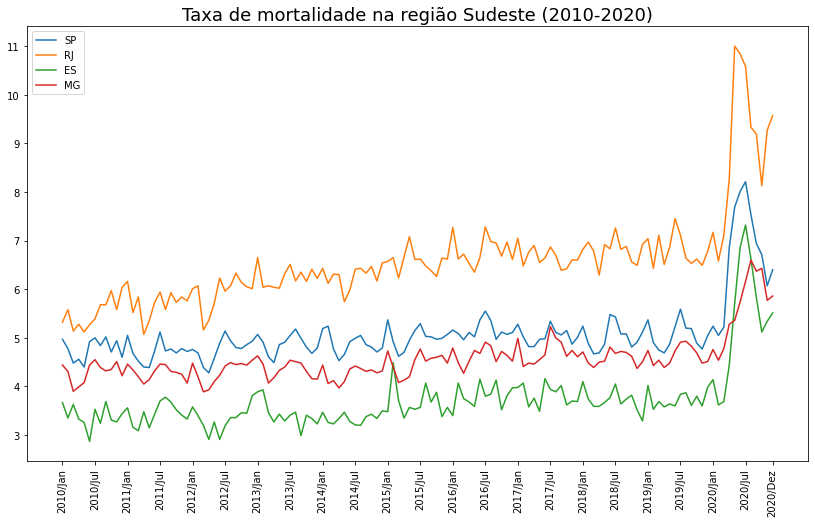

In [29]:
titulo = 'Taxa de mortalidade na região Sudeste (2010-2020)'

plot_grafico_linhas(new_taxa_mortalidade, titulo, sudeste)

Analizando esse gráfico vemos que o Rio de Janeiro, proporcioanlemente é mais letal que os outros estados da região.

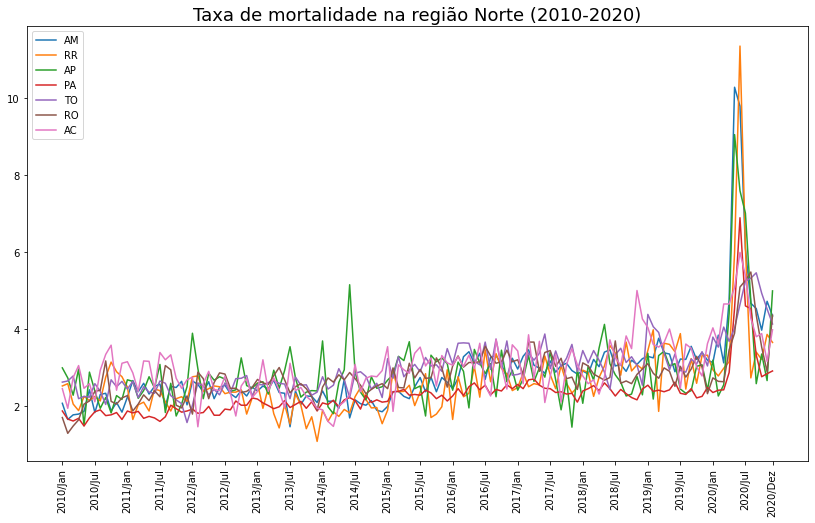

In [30]:
titulo = 'Taxa de mortalidade na região Norte (2010-2020)'
plot_grafico_linhas(new_taxa_mortalidade, titulo, norte)

Mesmo o gráfico sendo confundo devido à grande quantidade de linha, é possível que essa região sofreu grande impacto devido à pandemia, principalmente nos estados de Amazonas, Roraima e Amapá.

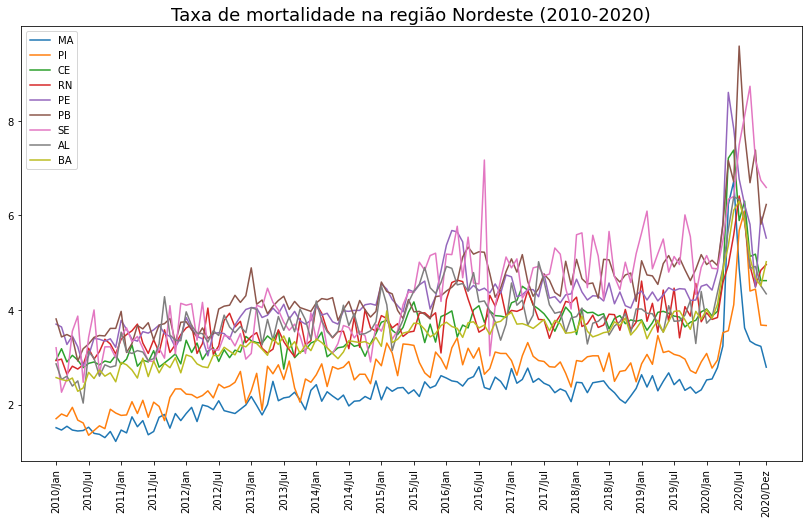

In [31]:
titulo = 'Taxa de mortalidade na região Nordeste (2010-2020)'
plot_grafico_linhas(new_taxa_mortalidade, titulo, nordeste)

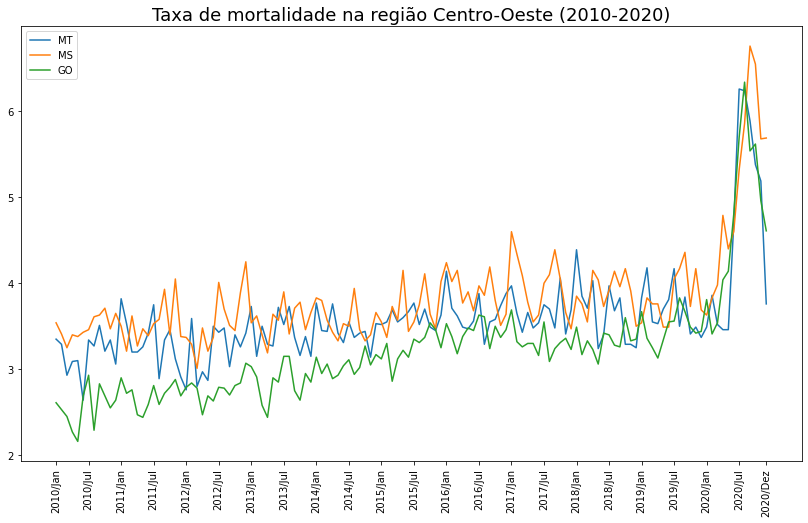

In [32]:
titulo = 'Taxa de mortalidade na região Centro-Oeste (2010-2020)'
plot_grafico_linhas(new_taxa_mortalidade, titulo, centro_oeste)

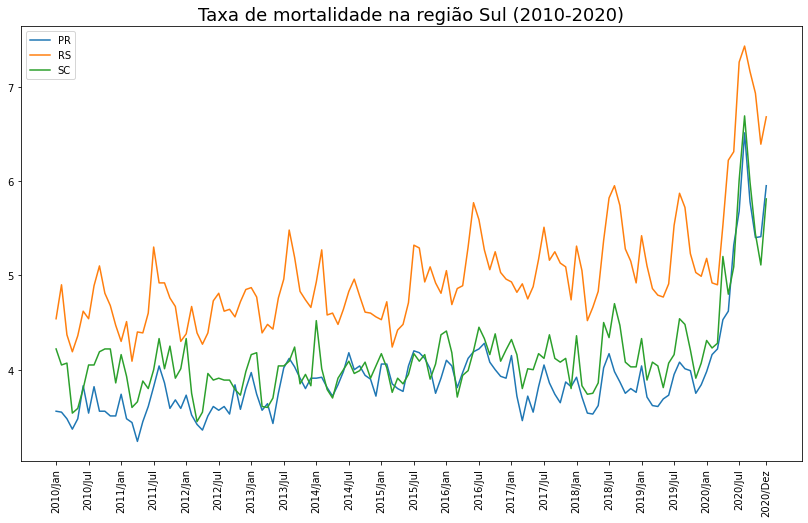

In [33]:
titulo = 'Taxa de mortalidade na região Sul (2010-2020)'
plot_grafico_linhas(new_taxa_mortalidade, titulo, sul)

#### As Internações Aumentaram a partir da Pandemia?

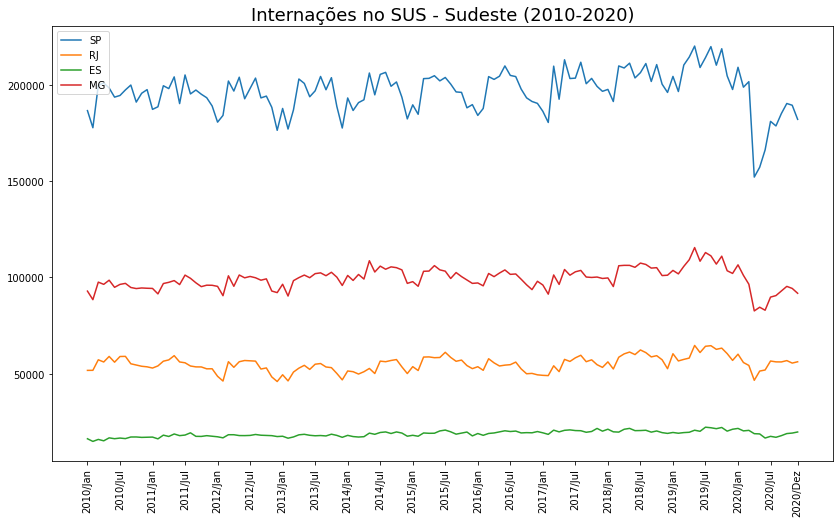

In [34]:
titulo = 'Internações no SUS - Sudeste (2010-2020)'
plot_grafico_linhas(new_internacoes,titulo, sudeste)

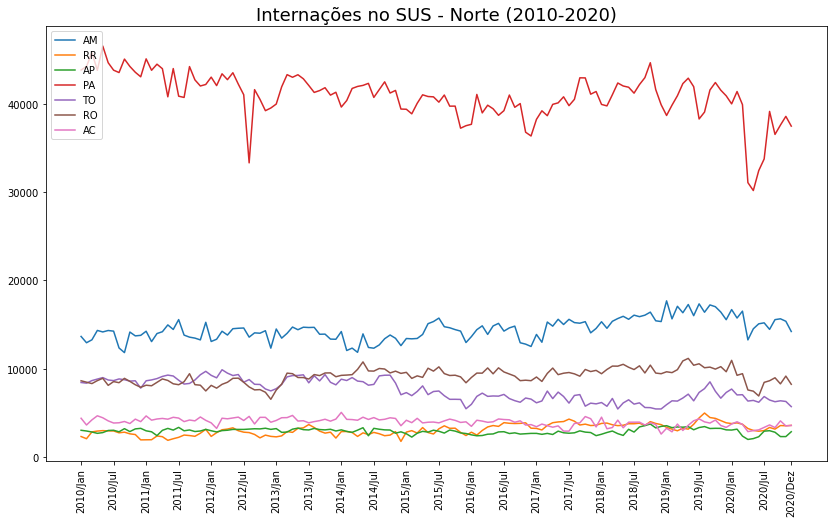

In [35]:
titulo = 'Internações no SUS - Norte (2010-2020)'
plot_grafico_linhas(new_internacoes,titulo, norte)

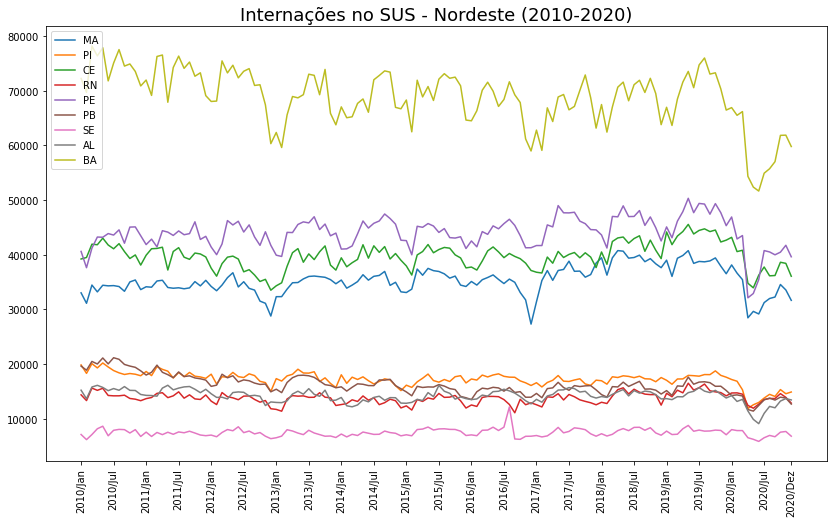

In [36]:
titulo = 'Internações no SUS - Nordeste (2010-2020)'
plot_grafico_linhas(new_internacoes,titulo, nordeste)

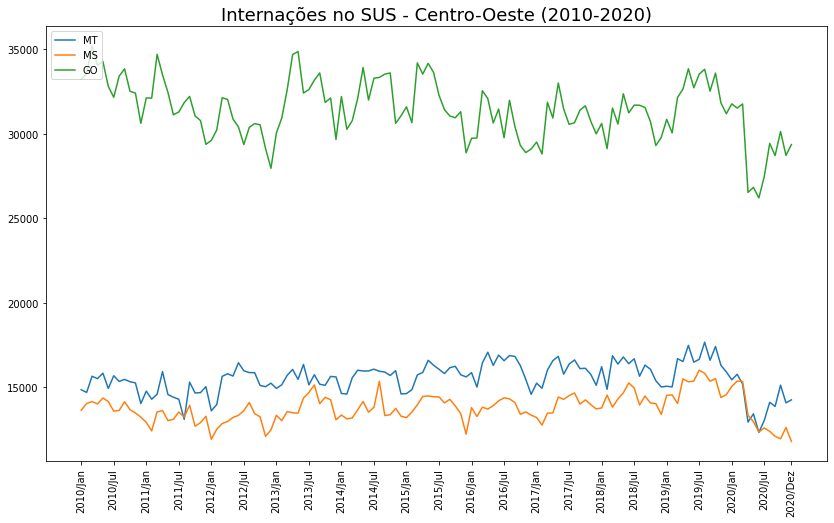

In [37]:
titulo = 'Internações no SUS - Centro-Oeste (2010-2020)'
plot_grafico_linhas(new_internacoes,titulo, centro_oeste)

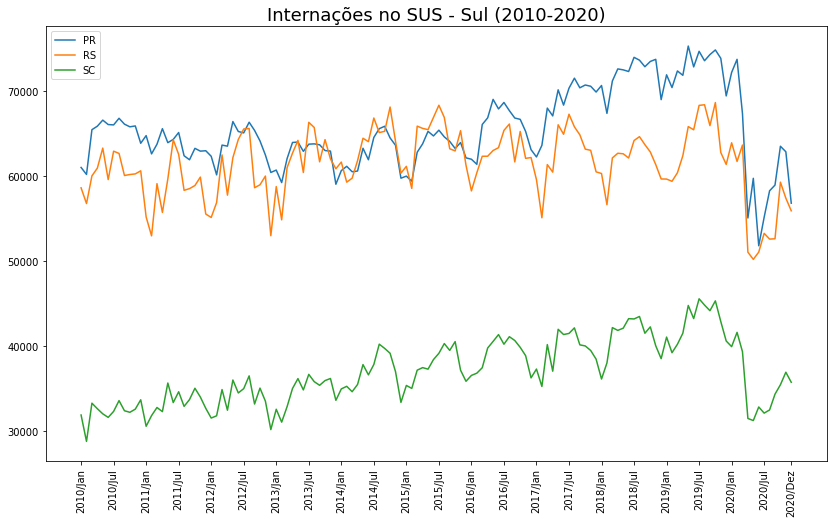

In [38]:
titulo = 'Internações no SUS - Sul (2010-2020)'
plot_grafico_linhas(new_internacoes,titulo, sul)

É curioso que, no semestre anterior ao início da pandemia (1° de 2020) houve uma queda drástica em todos os estados - Isso pode ser investigado em próximas análises.  
Mas sim, as internações voltam a aumentar após o início da pandemia.

#### Qual a relação entre a quantidade de internações e a média de permanência?  
Para responder essas pergunta, vamos verificar os estados com maiores quantidade de internações.

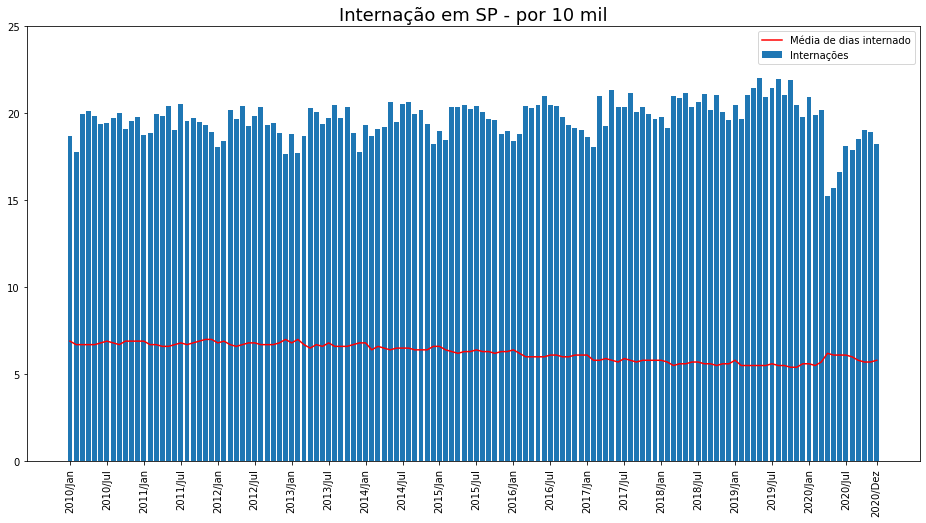

In [39]:
plt.figure(figsize=(16, 8))

plt.bar(new_internacoes.index,new_internacoes['SP'] / 10000)
plt.plot(new_media_permanencia_internacoes.index, new_media_permanencia_internacoes['SP'],
         color='r')

plt.yticks(np.arange(0, 26, 5))
plt.xticks(eixo_x, rotation=90)
plt.title('Internação em SP - por 10 mil', fontsize=18)
plt.legend(['Média de dias internado', 'Internações'])
plt.show()

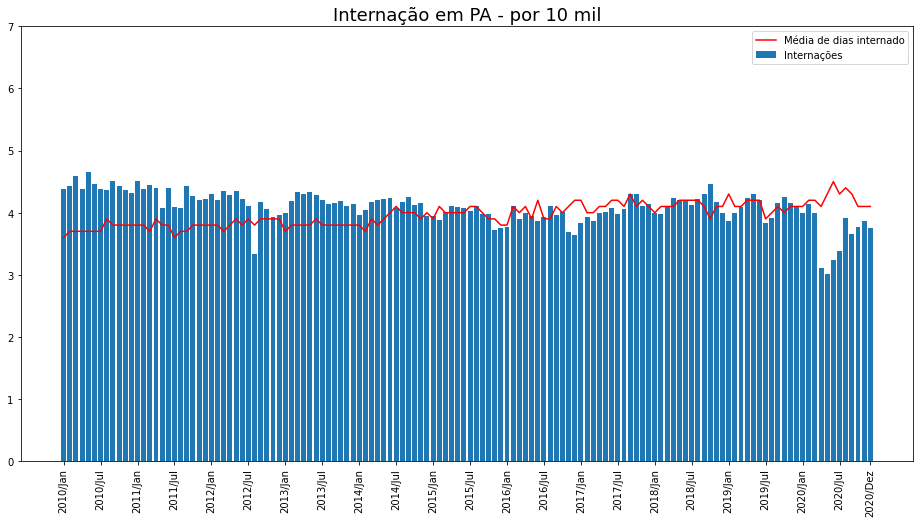

In [40]:
plt.figure(figsize=(16, 8))

plt.bar(new_internacoes.index,new_internacoes['PA'] / 10000)
plt.plot(new_media_permanencia_internacoes.index, new_media_permanencia_internacoes['PA'],
         color='r')

plt.yticks(np.arange(0, 8, 1))
plt.xticks(eixo_x, rotation=90)
plt.title('Internação em PA - por 10 mil', fontsize=18)
plt.legend(['Média de dias internado', 'Internações'])
plt.show()


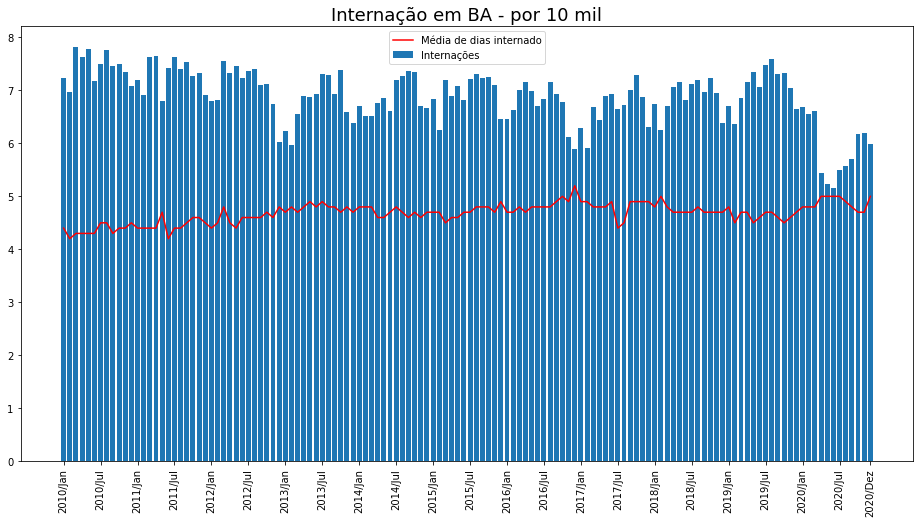

In [41]:
plt.figure(figsize=(16, 8))

plt.bar(new_internacoes.index,new_internacoes['BA'] / 10000)
plt.plot(new_media_permanencia_internacoes.index, new_media_permanencia_internacoes['BA'],
         color='r')

plt.yticks(np.arange(0, 9, 1))
plt.xticks(eixo_x, rotation=90)
plt.title('Internação em BA - por 10 mil', fontsize=18)
plt.legend(['Média de dias internado', 'Internações'])
plt.show()

A princíprio não é possível observar uma correlação entre a quantidade de interções e a média de permanência.

#### Existe correlação entre a média de dias internados e taxa de óbito?  
Será que, ficar mais tempo internado pode evoluir à óbito? Novamente, vamos verificar os estados com as maiores taxa de óbitos.

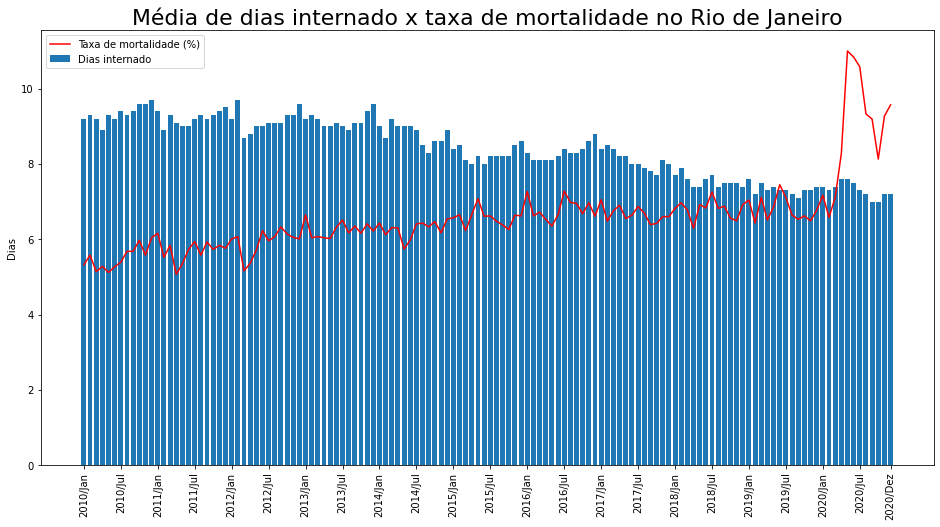

In [42]:
plt.figure(figsize=(16, 8))

plt.title('Média de dias internado x taxa de mortalidade no Rio de Janeiro', fontsize=22)
plt.bar(new_media_permanencia_internacoes.index, new_media_permanencia_internacoes['RJ'])

plt.plot(new_taxa_mortalidade.index, new_taxa_mortalidade['RJ'], color='r')

plt.ylabel('Dias')
plt.xticks(eixo_x, rotation=90)
plt.legend(['Taxa de mortalidade (%)', 'Dias internado'])
plt.show()

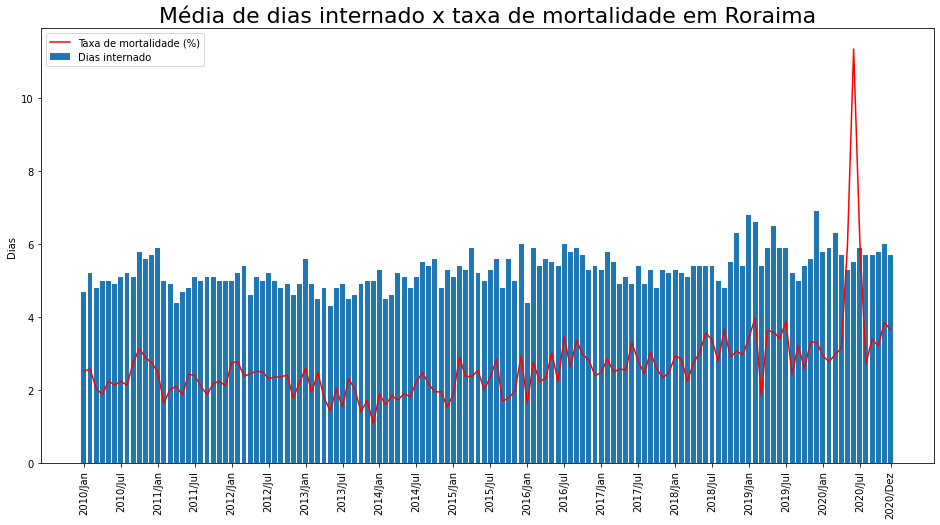

In [43]:
plt.figure(figsize=(16, 8))

plt.title('Média de dias internado x taxa de mortalidade em Roraima', fontsize=22)
plt.bar(new_media_permanencia_internacoes.index, new_media_permanencia_internacoes['RR'])

plt.plot(new_taxa_mortalidade.index, new_taxa_mortalidade['RR'], color='r')

plt.ylabel('Dias')
plt.xticks(eixo_x, rotation=90)
plt.legend(['Taxa de mortalidade (%)', 'Dias internado'])
plt.show()

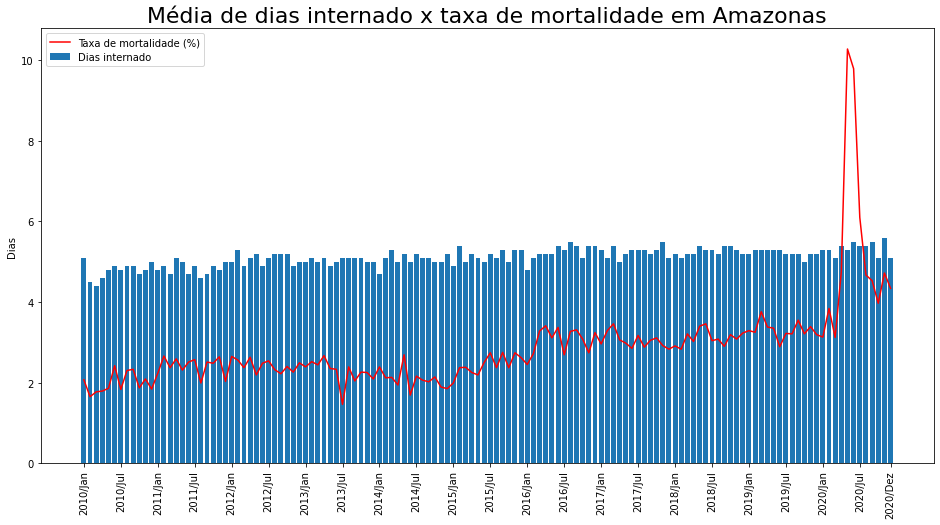

In [44]:
plt.figure(figsize=(16, 8))

plt.title('Média de dias internado x taxa de mortalidade em Amazonas', fontsize=22)
plt.bar(new_media_permanencia_internacoes.index, new_media_permanencia_internacoes['AM'])

plt.plot(new_taxa_mortalidade.index, new_taxa_mortalidade['AM'], color='r')

plt.ylabel('Dias')
plt.xticks(eixo_x, rotation=90)
plt.legend(['Taxa de mortalidade (%)', 'Dias internado'])
plt.show()

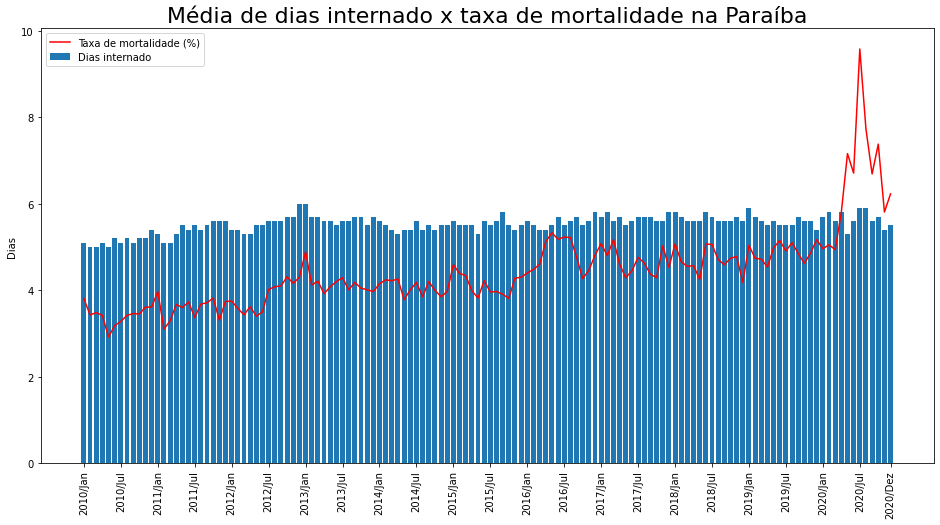

In [45]:
plt.figure(figsize=(16, 8))

plt.title('Média de dias internado x taxa de mortalidade na Paraíba', fontsize=22)
plt.bar(new_media_permanencia_internacoes.index, new_media_permanencia_internacoes['PB'])

plt.plot(new_taxa_mortalidade.index, new_taxa_mortalidade['PB'], color='r')

plt.ylabel('Dias')
plt.xticks(eixo_x, rotation=90)
plt.legend(['Taxa de mortalidade (%)', 'Dias internado'])
plt.show()

Nesse caso não pode ser observado uma correlação entre essas duas informações. Vemos que principalemnte em 2020 a taxa de mortalidade sobe assustadoramente, e formam picos e quedas, provavelmente por conta da estação no ano (principalmnte em meados de Junho observa-se uma queda relevante).

#### Gastar mais no sus diminui os dias de internação?  
Agora vamos observar se os gastos com o SUS reflete na média de permanência de internações.

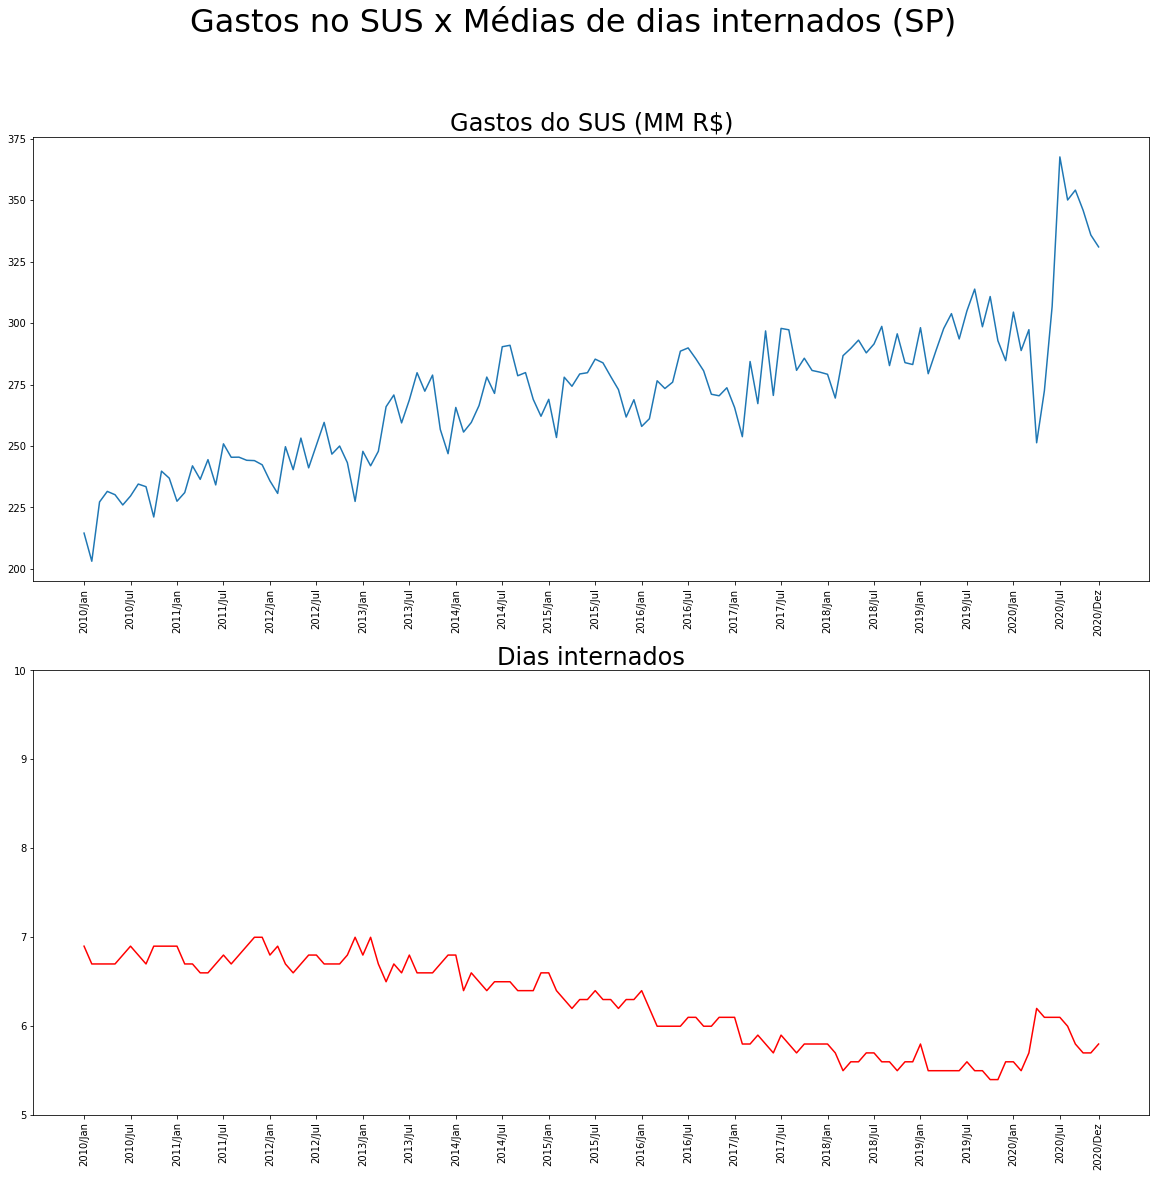

In [46]:
plt.figure(figsize=(20, 18))

plt.suptitle('Gastos no SUS x Médias de dias internados (SP)', fontsize=32)

plt.subplot(2, 1, 1)
plt.title('Gastos do SUS (MM R$)', fontsize=24)
plt.plot(new_gastos_sus.index, new_gastos_sus['SP'])
plt.xticks(eixo_x, rotation=90)

plt.subplot(2, 1, 2)
plt.title('Dias internados', fontsize=24)
plt.plot(new_media_permanencia_internacoes.index, new_media_permanencia_internacoes['SP'],
         color='r')
plt.yticks(np.arange(5, 10.1, 1))
plt.xticks(eixo_x, rotation=90)

plt.show()

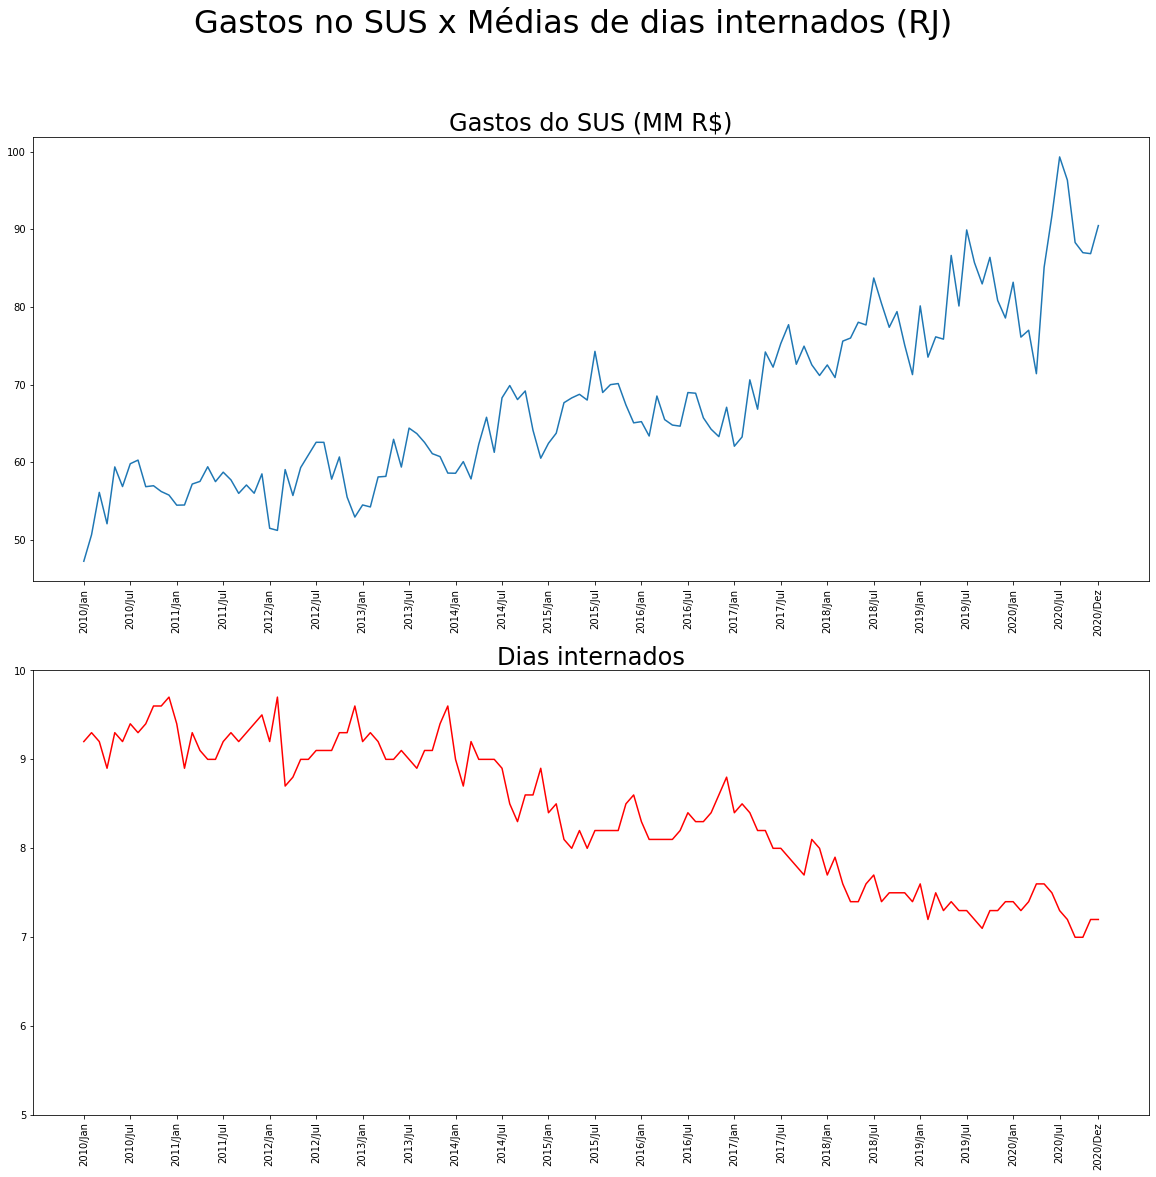

In [47]:
plt.figure(figsize=(20, 18))

plt.suptitle('Gastos no SUS x Médias de dias internados (RJ)', fontsize=32)

plt.subplot(2, 1, 1)
plt.title('Gastos do SUS (MM R$)', fontsize=24)
plt.plot(new_gastos_sus.index, new_gastos_sus['RJ'])
plt.xticks(eixo_x, rotation=90)

plt.subplot(2, 1, 2)
plt.title('Dias internados', fontsize=24)
plt.plot(new_media_permanencia_internacoes.index, new_media_permanencia_internacoes['RJ'],
         color='r')
plt.yticks(np.arange(5, 10.1, 1))
plt.xticks(eixo_x, rotation=90)

plt.show()

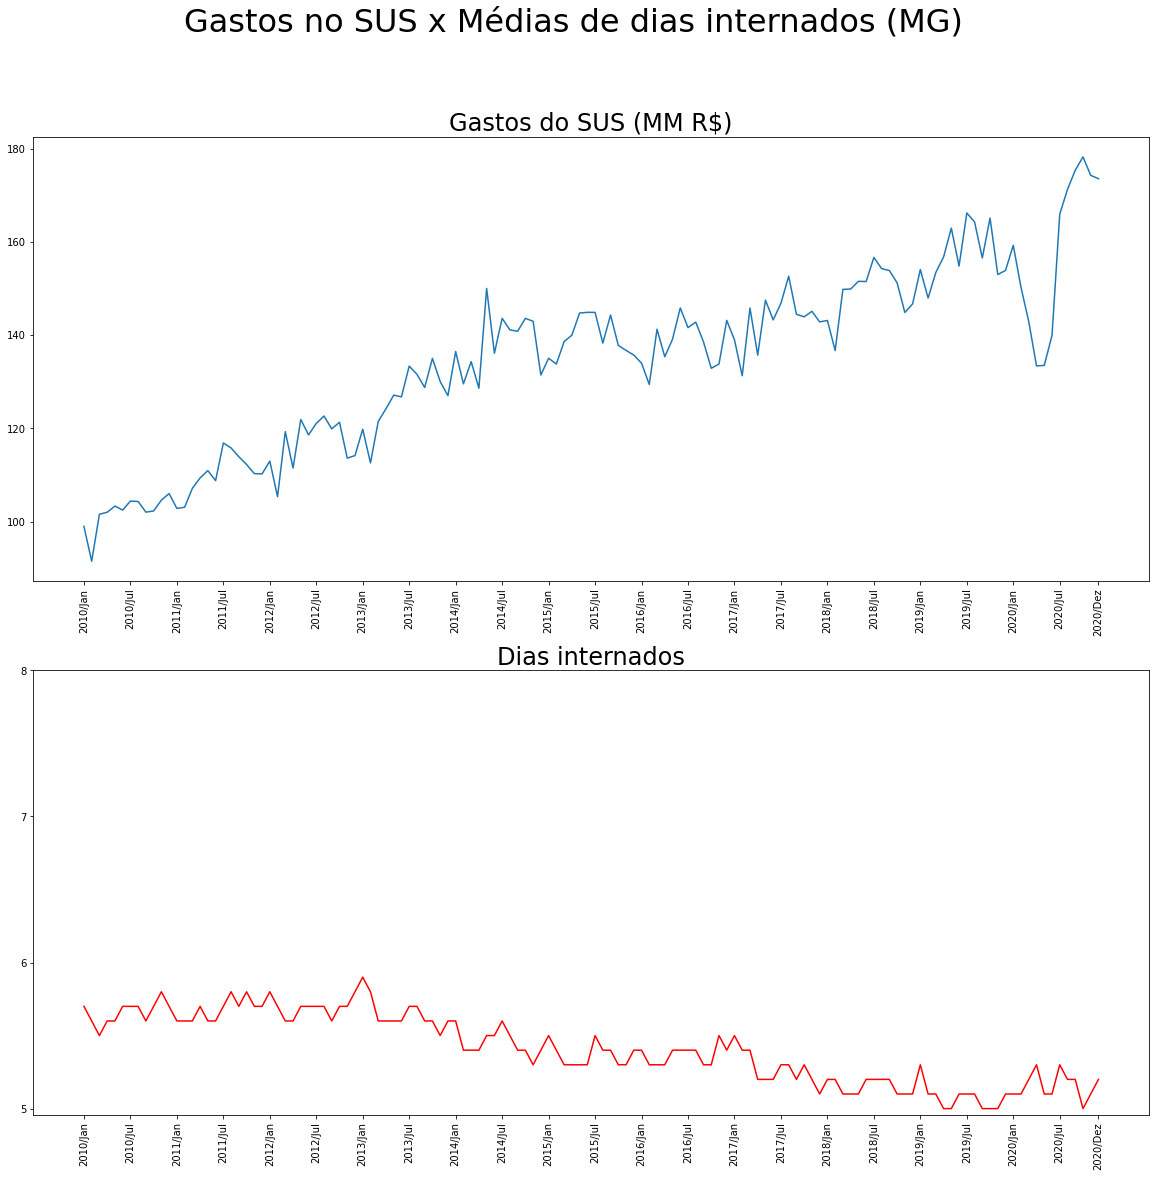

In [48]:
plt.figure(figsize=(20, 18))

plt.suptitle('Gastos no SUS x Médias de dias internados (MG)', fontsize=32)

plt.subplot(2, 1, 1)
plt.title('Gastos do SUS (MM R$)', fontsize=24)
plt.plot(new_gastos_sus.index, new_gastos_sus['MG'])
plt.xticks(eixo_x, rotation=90)

plt.subplot(2, 1, 2)
plt.title('Dias internados', fontsize=24)
plt.plot(new_media_permanencia_internacoes.index, new_media_permanencia_internacoes['MG'],
         color='r')
plt.yticks(np.arange(5, 8.1, 1))
plt.xticks(eixo_x, rotation=90)

plt.show()

Escolhi 3 dos 5 maiores gastos do SUS e é possível concluir que, quanto maior o gasto do SUS, menor é o período de dias de internação.

## Conclusão

Após a análise dos datasets, podemos chegar à algumas conclusões:
* A chegada da COVID19 foi um fator relevante para o aumento da taxa de mortalidade no SUS, especialmente nos estados da região Norte;
    * Na região sul os óbitos sobem no meio do ano (junho e julho) formando picos e regredindo após esse período. E após o início da pandemia esse a taxa de mortalidade salta para um novo patamar.
* Após o início da pandemia, a quantdidade de internações diminui drásticamente. Uma hipótese é que com as medidas restritivas que foram impostas em vários estados, a procura pelo médico ficou concentrado somente naqueles relacionados à COVID. Seria interessante ter a informação sobre a taxa de ocupação dos leitos para tentar validar essa hipótese. Outro ponto é acrescentar também a informação de 2021, para observar se a vacinação foi importante para diminuir esse dado;
* Observa-se que, nos estados onde o gasto aumenta os dias de internação tende a diminuir. Aqui precisamos fazer a ressalva de que esse gasto não é necessariamente investimento. Seria interessante procurar o valor do investimento para ver se essa tendência se mantém.